In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Video
import openpyxl

# Working with ALFAsim exported transient trend plots

## Introduction

The example shown here demonstrates the ALFAsim post-processing capabilities from an exported `.xls` file.

In [4]:
print(os.listdir(os.getcwd()))
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..","..")))
print(os.listdir(os.getcwd()))
"""
This block wea necessary to access the correct directory to import some functions
"""

['.ipynb_checkpoints', 'ALFAsim_example_01.ipynb', 'ALFAsim_example_02.ipynb', 'data']
['.git', '.gitignore', '.idea', 'environment.yml', 'LICENSE', 'multi_transient_reader', 'tests']


'\nThis block wea necessary to access the correct directory to import some functions\n'

## Import

First, we import the alfasim.from_plotsmodule to handle the exported ALFAsim data, and `statistical_tools.common_functions` to temporally average the data.

In [4]:
from multi_transient_reader.alfasim.from_export.xls_reader import create_trend_result_dictionary
from multi_transient_reader.statistical_tools.common_functions import compute_temporal_average

## Data Export

This example uses data exported directly from the trend window of ALFAsim's software.

The data was exported as shown in the animation below.

OBS: The folder name with ".xls" files is saved by ".alfasim file name + .excel_results" in the one below directory level of the ".alfasim"

In [6]:
Video(Path('data','videos','alfasim_example_02.mp4'), embed=True, width=640, height=360)

## Reading Data

After exporting the `.xls` file, we read the data as shown below. Then, we can navigate through the exported results

In [9]:
xls_folder = Path(os.path.join(os.getcwd(),"multi_transient_reader/examples/data/alfasim/from_export"))
results_dictionary = create_trend_result_dictionary(xls_folder)

In [10]:
results_dictionary = dict(sorted(results_dictionary.items(), key=lambda item: int(item[0])))

## Exploring the Exported Data

The exported data is now stored in the `results_dictionary` dictionary. 

From this dictionary, we can loop through and navigate the exported data.

The example case consists of two parametric runs. 

Let's iterate over the results and explore them. First, let's check how the data is organized in `results_dictionary`.

In [11]:
for parametric_run in results_dictionary.keys():
    print(f"Parametric Run {parametric_run}")
    for i, edge in enumerate(results_dictionary[parametric_run].keys()):
        if i == 0:
            time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
            continue
        print(f"  |{edge}")
        for probe in results_dictionary[parametric_run][edge].keys():
            probe_properties = results_dictionary[parametric_run][edge][probe]
            print(f"    |Probe @ {probe_properties['position']} [m]")
            for j, variable in enumerate(probe_properties.keys()):
                if j == 0: # The first entry is the position information. Currently we are assuming [m]
                    continue
                print(f"      |{variable} [{probe_properties[variable]['unit']}]")

Parametric Run 0
  |Conn 1
    |Probe @ 14.33 [m]
      |Holdup [-]
      |Pressure [Pa]
    |Probe @ 22.63 [m]
      |Pressure [Pa]
    |Probe @ 7.98 [m]
      |Holdup [-]
      |Total Oil Mass Flow Rate [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Holdup [-]
      |Pressure [Pa]
      |Total Oil Mass Flow Rate [kg/s]
    |Probe @ 5.0 [m]
      |Holdup [-]
      |Pressure [Pa]
      |Total Oil Mass Flow Rate [kg/s]
Parametric Run 1
  |Conn 1
    |Probe @ 14.33 [m]
      |Holdup [-]
      |Pressure [Pa]
    |Probe @ 22.63 [m]
      |Pressure [Pa]
    |Probe @ 7.98 [m]
      |Holdup [-]
      |Total Oil Mass Flow Rate [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Holdup [-]
      |Pressure [Pa]
      |Total Oil Mass Flow Rate [kg/s]
    |Probe @ 5.0 [m]
      |Holdup [-]
      |Pressure [Pa]
      |Total Oil Mass Flow Rate [kg/s]


## Example 1 -- Averaging data over time

As observed, we can easily navigate through the exported results. 

To access the temporal values, we simply use the `values` key.

Let's compute the time-averaged results for each variable across the different parametric runs, edges, and probes.

In [12]:
for parametric_run in results_dictionary.keys():
    print(f"Parametric Run {parametric_run}")
    for i, edge in enumerate(results_dictionary[parametric_run].keys()):
        if i == 0:
            time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable. We are always assuming [s]
            continue
        print(f"  |{edge}")
        for probe in results_dictionary[parametric_run][edge].keys():
            probe_properties = results_dictionary[parametric_run][edge][probe]
            print(f"    |Probe @ {probe_properties['position']} [m]")
            for j, variable in enumerate(probe_properties.keys()):
                if j == 0: # The first entry is the position information. Currently we are assuming [m]
                    continue
                avg_value = compute_temporal_average(time_values, probe_properties[variable]['values'])
                unit = probe_properties[variable]['unit']
                print(f"      |Time-averaged - {variable} =  {avg_value:.4f} [{unit}]")
    print('\n')

Parametric Run 0
  |Conn 1
    |Probe @ 14.33 [m]
      |Time-averaged - Holdup =  0.2132 [-]
      |Time-averaged - Pressure =  203761.4060 [Pa]
    |Probe @ 22.63 [m]
      |Time-averaged - Pressure =  201869.7395 [Pa]
    |Probe @ 7.98 [m]
      |Time-averaged - Holdup =  0.2442 [-]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Time-averaged - Holdup =  0.4005 [-]
      |Time-averaged - Pressure =  200017.0478 [Pa]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]
    |Probe @ 5.0 [m]
      |Time-averaged - Holdup =  0.2734 [-]
      |Time-averaged - Pressure =  200019.5893 [Pa]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]


Parametric Run 1
  |Conn 1
    |Probe @ 14.33 [m]
      |Time-averaged - Holdup =  0.0988 [-]
      |Time-averaged - Pressure =  219222.8174 [Pa]
    |Probe @ 22.63 [m]
      |Time-averaged - Pressure =  208697.9359 [Pa]
    |Probe @ 7.98 [m]
      |Time-averaged - Holdu

## Example 2 -- Plotting temporal results


To finish our examples, let's plot the transient pressure and holdup values along some different probes. It is important always verify the variables are available

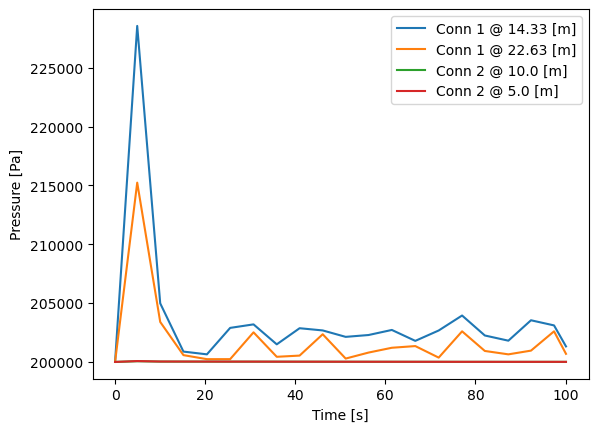

In [16]:
parametric_run = '0'
variable = 'Pressure'
for i, edge in enumerate(results_dictionary[parametric_run].keys()):
    if i == 0:
        time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
        continue
    for probe in results_dictionary[parametric_run][edge].keys():
        probe_properties = results_dictionary[parametric_run][edge][probe]
        if variable in probe_properties.keys():
            variable_values = probe_properties[variable]['values']

            plt.plot(time_values, variable_values, label=f"{edge} @ {probe_properties['position']} [m]")
plt.xlabel('Time [s]')
plt.ylabel(f"{variable} [{probe_properties[variable]['unit']}]")
plt.legend()

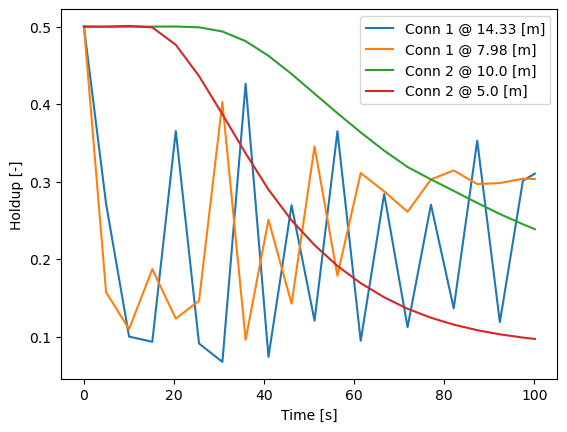

In [20]:
parametric_run = '0'
variable = 'Holdup'
for i, edge in enumerate(results_dictionary[parametric_run].keys()):
    if i == 0:
        time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
        continue
    for probe in results_dictionary[parametric_run][edge].keys():
        probe_properties = results_dictionary[parametric_run][edge][probe]
        if variable in probe_properties.keys():
            variable_values = probe_properties[variable]['values']

            plt.plot(time_values, variable_values, label=f"{edge} @ {probe_properties['position']} [m]")
plt.xlabel('Time [s]')
plt.ylabel(f"{variable} [{probe_properties[variable]['unit']}]")
plt.legend()
